<a href="https://colab.research.google.com/github/LeonimerMelo/GANs/blob/main/MNIST_digits_MLP_GAN_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Generativas Adversariais (GANs)
As **Generative Adversarial Networks (GANs)** s√£o um novo tipo de arquitetura neural introduzida por Ian Goodfellow e outros pesquisadores da Universidade de Montreal em 2014. A caracter√≠stica mais not√°vel das GANs √© sua capacidade de criar imagens, v√≠deos, m√∫sicas e textos hiper-realistas.  

Esses modelos de redes neurais realmente criam novos conte√∫dos que n√£o existiam antes ‚Äî novas pessoas, novos objetos, uma nova realidade, como m√°gica! Treinamos esses modelos em um conjunto de dados de um dom√≠nio espec√≠fico, e ent√£o eles criam novas imagens com objetos do mesmo dom√≠nio que parecem muito pr√≥ximos dos dados reais.  

Veja exemplos de geradores de rostos com GANs no site [This Person Does Not Exist](https://thispersondoesnotexist.com/). Ele usa uma tecnologia especial chamada **StyleGAN3**, que funciona como um artista no mundo digital. Ela est√° aqui para criar rostos que parecem t√£o reais que voc√™ pode pensar que s√£o pessoas de verdade ‚Äî mas n√£o s√£o! Esses rostos s√£o todos feitos por um computador superinteligente, usando suas habilidades para criar indiv√≠duos detalhados e √∫nicos que voc√™ n√£o encontrar√° em nenhum outro lugar.  

Ao aprender a imitar qualquer distribui√ß√£o de dados, os computadores podem ser ensinados a criar mundos semelhantes ao nosso em qualquer dom√≠nio: imagens, m√∫sica, fala, prosa, etc.

Como voc√™ pode ver no diagrama de arquitetura, uma GAN segue os seguintes passos:  

1. O **gerador** recebe n√∫meros aleat√≥rios e retorna uma imagem.  
2. Essa imagem gerada √© enviada ao **discriminador** junto com um fluxo de imagens reais, extra√≠das do conjunto de dados verdadeiro (ground-truth).  
3. O **discriminador** recebe tanto as imagens reais quanto as falsas e retorna probabilidades: n√∫meros entre 0 e 1, onde 1 representa uma previs√£o de autenticidade (imagem real) e 0 representa uma previs√£o de falsidade (imagem falsa).  

Essa intera√ß√£o entre o gerador e o discriminador √© o cerne do funcionamento das GANs, onde o gerador tenta criar imagens cada vez mais realistas para "enganar" o discriminador, enquanto o discriminador tenta se tornar cada vez melhor em distinguir entre imagens reais e falsas. Esse processo competitivo leva √† gera√ß√£o de conte√∫dos altamente realistas.

<center><img src='https://drive.google.com/uc?id=18FoExFcG3DZhMfFt6ys4AsrqpWuq7jCR' width=900></center>

A arquitetura da GAN √© composta por redes **geradoras** e **discriminadoras**. Observe que a rede discriminadora √© uma CNN (Rede Neural Convolucional) t√≠pica, na qual as camadas convolucionais diminuem de tamanho at√© chegarem √† camada achatada (flattened layer). Por outro lado, a rede geradora √© uma CNN invertida que come√ßa com um vetor achatado: as camadas convolucionais aumentam de tamanho at√© formar a dimens√£o das imagens de entrada.  

Essa estrutura permite que o gerador transforme um vetor de n√∫meros aleat√≥rios em uma imagem com as mesmas dimens√µes das imagens reais, enquanto o discriminador analisa as imagens (reais e falsas) e as classifica como aut√™nticas ou falsas. Essa din√¢mica entre as duas redes √© o que impulsiona o aprendizado e a gera√ß√£o de conte√∫dos realistas.

## O modelo Discriminador  
O objetivo do discriminador √© prever se uma imagem √© real ou falsa. Esse √© um problema t√≠pico de classifica√ß√£o supervisionada, ent√£o podemos usar uma rede de classifica√ß√£o tradicional. A rede consiste em camadas convolucionais empilhadas, seguidas por uma camada densa de sa√≠da com uma fun√ß√£o de ativa√ß√£o sigmoide. Usamos a fun√ß√£o de ativa√ß√£o sigmoide porque esse √© um problema de classifica√ß√£o bin√°ria: o objetivo da rede √© gerar valores de probabilidade de previs√£o que variam entre 0 e 1, onde 0 significa que a imagem gerada pelo gerador √© falsa e 1 significa que √© 100% real.  

Essa estrutura permite que o discriminador avalie a autenticidade das imagens, fornecendo feedback ao gerador para que ele possa melhorar sua capacidade de criar imagens realistas. A competi√ß√£o entre o gerador e o discriminador √© o que impulsiona o aprimoramento cont√≠nuo de ambos os modelos.

<center><img src='https://drive.google.com/uc?id=1lK04uhbNwlbuf2s7pOFFQO3jAOMGoXeI' width=900></center>

O discriminador √© uma rede com modelo de classifica√ß√£o j√° bem compreendido. Treinar o discriminador √© bastante direto. Alimentamos o discriminador com imagens rotuladas: falsas (ou geradas) e reais. As imagens reais v√™m do conjunto de dados de treinamento, e as imagens falsas s√£o a sa√≠da do modelo gerador.  

Durante o treinamento:  
1. **Imagens reais**: S√£o rotuladas como "1" (100% reais) e usadas para ensinar o discriminador a reconhecer caracter√≠sticas aut√™nticas.  
2. **Imagens falsas**: S√£o rotuladas como "0" (falsas) e usadas para ensinar o discriminador a identificar conte√∫dos gerados pelo gerador.  

Esse processo de treinamento ajuda o discriminador a se tornar cada vez mais preciso em distinguir entre imagens reais e falsas. Ao mesmo tempo, o gerador √© treinado para criar imagens que "enganem" o discriminador, levando a uma melhoria cont√≠nua de ambos os modelos. Essa intera√ß√£o competitiva √© a ess√™ncia das GANs.

##A Simple Generative Adversarial Network with Keras

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, LeakyReLU, UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras import backend
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

Before you can start building the discriminator and generator, you should first gather and pre-process the data. You will use the popular MNIST dataset which has a set of images of single digits ranging from 0 to 9.

Note that the `mnist.load_data()` is part of Keras and allows you to easily import the MNIST dataset into your workspace.

In [2]:
# Load MNIST digits dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, _), (x_test, _) = mnist.load_data()
print('x train shape:', x_train.shape)
# utilizo todo o banco de dados para treinamento (x_train)
x_train = np.concatenate([x_train, x_test])
print('x train shape:', x_train.shape)
print('min', x_train.min(), 'max', x_train.max())
# normalize our inputs to be in the range[-1, 1]
x_train = (x_train.astype(np.float32) - 127.5)/127.5
print('x train shape:', x_train.shape)
print('min', x_train.min(), 'max', x_train.max())
# convert x_train with a shape of (70000, 28, 28) to (70000, 784) so we have 784 columns per row
x_train = x_train.reshape(x_train.shape[0], 784)
print('x train shape:', x_train.shape)
print('min', x_train.min(), 'max', x_train.max())

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
x train shape: (60000, 28, 28)
x train shape: (70000, 28, 28)
min 0 max 255
x train shape: (70000, 28, 28)
min -1.0 max 1.0
x train shape: (70000, 784)
min -1.0 max 1.0


Now, you can create your generator and discriminator networks. Initially you can use the Adam optimizer for both networks. For both the generator and discriminator, you will create a neural network with three hidden layers with the activation function being the Leaky Relu. You should also add dropout layers for the discriminator to improve its robustness on unseen images.

## O Discriminador  
Aqui, desenvolvemos uma rede neural feedforward simples para o Discriminador, onde passaremos o tamanho de uma imagem. A fun√ß√£o de ativa√ß√£o usada √© a **Leaky ReLU** (voc√™ j√° conhece o motivo para isso), e a fun√ß√£o **sigmoid** √© usada na camada de sa√≠da para problemas de classifica√ß√£o bin√°ria, a fim de classificar as imagens como reais ou falsas.  

Agora, vamos implementar a rede do discriminador no Keras. Neste trecho de c√≥digo, o formato da imagem de entrada √© 28 √ó 28, redimensionado para um vetor de 784 elementos.  

Aqui est√° um exemplo de como isso pode ser implementado:

In [3]:
#@title Implementing the discriminator model
# inicializa a sess√£o
backend.clear_session()
discriminator = Sequential(name='Discriminator')
discriminator.add(Input(shape=(28*28,)))
discriminator.add(Dense(1024))
# discriminator.add(Dense(1024, input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
#discriminator.compile(loss='binary_crossentropy', optimizer='adam')
#opt = Adam(lr=0.0002, beta_1=0.5)
#discriminator.compile(loss='binary_crossentropy', optimizer=opt)

discriminator.summary()

Model: "Discriminator"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                        ‚îÇ (None, 1024)                ‚îÇ         803,840 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu (LeakyReLU)              ‚îÇ (None, 1024)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 1024)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 512)                 ‚îÇ         524,800 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_1 (LeakyReLU)            ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 256)                 ‚îÇ         131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_2 (LeakyReLU)            ‚îÇ (None, 256)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)                  ‚îÇ (None, 256)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ             257 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,460,225 (5.57 MB)

 Trainable params: 1,460,225 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

### Explica√ß√£o do c√≥digo:
1. **Entrada**: A imagem de 28x28 pixels √© achatada em um vetor de 784 elementos.
2. **Camadas densas**: S√£o usadas camadas densas (fully connected) com ativa√ß√£o **Leaky ReLU** para evitar o problema de neur√¥nios "mortos" que pode ocorrer com a ReLU tradicional.
3. **Sa√≠da**: A camada de sa√≠da tem 1 neur√¥nio com ativa√ß√£o **sigmoid**, que retorna uma probabilidade entre 0 (falsa) e 1 (real).
4. **Compila√ß√£o**: O modelo √© compilado com a fun√ß√£o de perda `binary_crossentropy`, adequada para problemas de classifica√ß√£o bin√°ria, e o otimizador **Adam** ou **RMSprop** √© usado para ajustar os pesos.

Essa √© uma implementa√ß√£o b√°sica do discriminador, que pode ser aprimorada com t√©cnicas como dropout, normaliza√ß√£o em lote (batch normalization) ou camadas convolucionais, dependendo da complexidade do problema.

#### Por que usamos Leaky ReLU?  
A Leaky ReLU ajuda o gradiente a fluir mais facilmente pela arquitetura da rede neural.  

- A fun√ß√£o de ativa√ß√£o **ReLU** tradicional retorna apenas o valor m√°ximo entre a entrada e zero. Se usarmos ReLU, h√° uma chance de a rede ficar presa em um estado conhecido como **Dying ReLU** (ReLU "morta"). Se isso acontecer, a rede produzir√° apenas zero para todas as sa√≠das, o que impede o aprendizado.  
- Nosso objetivo √© obter o valor do gradiente do Discriminador para fazer o Gerador funcionar. Se a rede ficar presa no estado Dying ReLU, o aprendizado n√£o ocorrer√°.  
- A **Leaky ReLU** usa um par√¢metro chamado **alpha** para controlar valores negativos, permitindo que eles passem pela rede, embora atenuados. Se a entrada for positiva, ela retornar√° o valor positivo. Se for negativa, multiplicar√° o valor por **alpha** (um pequeno valor, como 0.2) e permitir√° que algum valor negativo passe pela rede. Isso evita o problema do Dying ReLU.  

#### Por que usamos Batch Normalization?  
A normaliza√ß√£o em lote (Batch Normalization) tem o efeito de estabilizar o processo de treinamento, padronizando as ativa√ß√µes da camada anterior para ter m√©dia zero e vari√¢ncia unit√°ria. A Batch Normalization se tornou essencial ao treinar redes convolucionais profundas, e as GANs n√£o s√£o diferentes.  

No entanto, aplicar a normaliza√ß√£o em lote diretamente em todas as camadas pode resultar em oscila√ß√µes nas amostras e instabilidade do modelo. Por isso, √© comum aplicar a Batch Normalization de forma seletiva, dependendo da arquitetura e do comportamento do modelo durante o treinamento.  

### Resumo:
- **Leaky ReLU**: Evita o problema do Dying ReLU, permitindo que gradientes negativos (embora pequenos) fluam pela rede, o que √© crucial para o treinamento de GANs.  
- **Batch Normalization**: Estabiliza o treinamento, padronizando as ativa√ß√µes, mas deve ser aplicada com cuidado para evitar instabilidades.  

Essas t√©cnicas s√£o fundamentais para garantir que o Discriminador e o Gerador possam aprender de forma eficaz e equilibrada durante o treinamento das GANs.

## O Gerador  
Aqui, definimos uma fun√ß√£o para desenvolver uma rede neural convolucional profunda (CNN). A vari√°vel **latent_dim** define o n√∫mero de entradas para o modelo. Definimos a camada de entrada, tr√™s camadas ocultas seguidas por **Batch Normalization**, com a fun√ß√£o de ativa√ß√£o **Leaky ReLU**, e uma camada de sa√≠da com a fun√ß√£o de ativa√ß√£o **tanh**, pois o intervalo dos pixels da imagem est√° entre -1 e +1.  

Aqui est√° um exemplo de como implementar o Gerador no Keras:

In [4]:
#@title Implementing the generator model
np.random.seed(10)
# The dimension of our random noise vector.
random_dim = 100
# inicializa a sess√£o
#backend.clear_session()
generator = Sequential(name='Generator')
generator.add(Input(shape=(random_dim,)))
generator.add(Dense(256))
#generator.add(Dense(256, input_dim=random_dim))
generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization(momentum=0.7))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization(momentum=0.7))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization(momentum=0.7))

generator.add(Dense(784, activation='tanh'))
#generator.compile(loss='binary_crossentropy', optimizer='rmsprop')
#generator.compile(loss='binary_crossentropy', optimizer='adam')
#opt = Adam(lr=0.0002, beta_1=0.5)
#generator.compile(loss='binary_crossentropy', optimizer=opt)

generator.summary()

Model: "Generator"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_4 (Dense)                      ‚îÇ (None, 256)                 ‚îÇ          25,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_3 (LeakyReLU)            ‚îÇ (None, 256)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                      ‚îÇ (None, 512)                 ‚îÇ         131,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_4 (LeakyReLU)            ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                      ‚îÇ (None, 1024)                ‚îÇ         525,312 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_5 (LeakyReLU)            ‚îÇ (None, 1024)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                      ‚îÇ (None, 784)                 ‚îÇ         803,600 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

### Explica√ß√£o do c√≥digo:
1. **Entrada**: O gerador recebe um vetor de ru√≠do de dimens√£o **latent_dim** (por exemplo, 100). Esse vetor √© a semente para gerar novas imagens.
2. **Camadas ocultas**:  
   - Usamos camadas densas (fully connected) com ativa√ß√£o **Leaky ReLU** para evitar o problema de neur√¥nios "mortos".  
   - A **Batch Normalization** √© aplicada ap√≥s cada camada oculta para estabilizar o treinamento e acelerar a converg√™ncia.  
3. **Sa√≠da**:  
   - A camada de sa√≠da tem 784 neur√¥nios (28x28 pixels) com ativa√ß√£o **tanh**, que garante que os valores dos pixels estejam no intervalo [-1, 1].  
   - A camada **Reshape** redimensiona o vetor de sa√≠da para o formato da imagem (28x28).  

### Por que usamos **tanh** na camada de sa√≠da?
- O intervalo de sa√≠da da fun√ß√£o **tanh** √© [-1, 1], o que corresponde ao intervalo normalizado dos pixels da imagem. Isso ajuda a garantir que as imagens geradas tenham valores de pixel v√°lidos.

### Resumo:
- O Gerador transforma um vetor de ru√≠do (latent_dim) em uma imagem realista.  
- **Leaky ReLU** e **Batch Normalization** s√£o usados para melhorar o fluxo de gradientes e estabilizar o treinamento.  
- A fun√ß√£o **tanh** na camada de sa√≠da garante que os pixels da imagem gerada estejam no intervalo [-1, 1].  

Essa √© uma implementa√ß√£o b√°sica do Gerador, que pode ser aprimorada com t√©cnicas como camadas convolucionais, dropout ou outras arquiteturas avan√ßadas, dependendo da complexidade do problema.

It is finally time to bring the generator and discriminator together!

In [6]:
# We initially set trainable to False since we only want to train either the generator or discriminator at a time
discriminator.trainable = False
# gan input (noise) will be 100-dimensional vectors
gan_input = Input(shape=(random_dim,), name='GAN input')
# the output of the generator (an image)
x = generator(gan_input)
# get the output of the discriminator (probability if the image is real or not)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output, name='GAN')
gan.compile(loss='binary_crossentropy', optimizer='adam')
#gan.compile(loss='binary_crossentropy', optimizer='rmsprop')
#opt = Adam(lr=0.0002, beta_1=0.5)
#gan.compile(loss='binary_crossentropy', optimizer=opt)

# salva os pesos iniciais da rede sem treinamento
gan_weights = gan.get_weights()

gan.summary()

Model: "GAN"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ GAN input (InputLayer)               ‚îÇ (None, 100)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Generator (Sequential)               ‚îÇ (None, 784)                 ‚îÇ       1,486,352 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Discriminator (Sequential)           ‚îÇ (None, 1)                   ‚îÇ       1,460,225 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 2,946,577 (11.24 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 1,460,225 (5.57 MB)

## Treinando a GAN  
Agora que aprendemos sobre os modelos do **Discriminador** e do **Gerador** separadamente, vamos junt√°-los para treinar uma rede generativa advers√°ria (GAN) de ponta a ponta. O Discriminador √© treinado para se tornar um classificador melhor, maximizando a probabilidade de atribuir o r√≥tulo correto tanto √†s imagens reais do conjunto de treinamento quanto √†s imagens geradas pelo Gerador (falsas). Por exemplo, √© como se um policial estivesse se tornando cada vez melhor em diferenciar entre notas falsas e reais. Por outro lado, o Gerador √© treinado para se tornar um falsificador melhor, maximizando suas chances de enganar o Discriminador. Ambos os modelos est√£o melhorando em suas respectivas tarefas.  

O processo de treinamento de uma GAN envolve duas etapas principais:

---

### 1. **Treinando o Discriminador**  
Esse √© um processo de treinamento supervisionado direto. A rede recebe imagens rotuladas vindas do Gerador (falsas) e do conjunto de dados de treinamento (reais), e aprende a classificar entre imagens reais e falsas com uma sa√≠da de previs√£o sigmoide. Nada de novo aqui.  

**Passos:**  
- Alimente o Discriminador com um lote de imagens reais (r√≥tulo = 1).  
- Gere um lote de imagens falsas usando o Gerador (r√≥tulo = 0).  
- Treine o Discriminador para classificar corretamente as imagens reais e falsas, minimizando a fun√ß√£o de perda (por exemplo, `binary_crossentropy`).  

---

### 2. **Treinando o Gerador**  
Esse processo √© um pouco mais complexo. O modelo do Gerador n√£o pode ser treinado sozinho como o Discriminador. Ele precisa do modelo do Discriminador para dizer se fez um bom trabalho ao gerar imagens falsas. Portanto, criamos uma rede combinada para treinar o Gerador, composta por ambos os modelos (Discriminador e Gerador).  

**Passos:**  
- Gere um lote de imagens falsas usando o Gerador.  
- Conecte essas imagens ao Discriminador para obter previs√µes.  
- Treine o Gerador para maximizar a probabilidade de o Discriminador classificar as imagens falsas como reais (r√≥tulo = 1).  
- Nessa etapa, os pesos do Discriminador s√£o congelados, e apenas os pesos do Gerador s√£o atualizados.  

---

### Analogia do Treinamento  
Pense no processo de treinamento como duas pistas paralelas:  
- **Pista 1**: Treina o Discriminador sozinho, melhorando sua capacidade de distinguir entre imagens reais e falsas.  
- **Pista 2**: Treina o Gerador usando a rede combinada (Gerador + Discriminador), melhorando sua capacidade de gerar imagens que enganem o Discriminador.  

Essa competi√ß√£o entre o Gerador e o Discriminador √© o que impulsiona o aprimoramento cont√≠nuo de ambos os modelos.  

---

### Ilustra√ß√£o do Processo de Treinamento  
1. **Fase 1**: Treinar o Discriminador com imagens reais e falsas.  
2. **Fase 2**: Congelar o Discriminador e treinar o Gerador para enganar o Discriminador.  
3. **Repetir**: Alternar entre as duas fases at√© que o Gerador produza imagens realistas e o Discriminador n√£o consiga mais distinguir entre imagens reais e falsas.  

---

### Resumo:
- O **Discriminador** √© treinado para classificar imagens reais e falsas.  
- O **Gerador** √© treinado para gerar imagens que enganem o Discriminador.  
- O treinamento alternado entre os dois modelos leva √† gera√ß√£o de imagens cada vez mais realistas.  

Essa din√¢mica competitiva √© a ess√™ncia das GANs e o que as torna t√£o poderosas para tarefas de gera√ß√£o de conte√∫do!

<center><img src='https://drive.google.com/uc?id=1HxuZmA59YsfFBz8dwRo9AFBGkpBzuG3f' width=900></center>

#### Representando Amostras de Ru√≠do  
Agora, criaremos uma entrada para representar amostras de ru√≠do do espa√ßo latente (`random_dim=100`). Esse ru√≠do ser√° passado para o Gerador, que gerar√° uma imagem. Em seguida, passamos a imagem gerada para o Discriminador, que prever√° se a imagem √© falsa ou real. Na fase inicial, n√£o queremos que o Discriminador seja treinado, e a imagem √© claramente falsa.  

Aqui est√° um exemplo de como isso pode ser implementado:

In [56]:
import numpy as np

# Definindo o tamanho do lote (batch_size) e a dimens√£o do ru√≠do (random_dim)
batch_size = 32
random_dim = 100

# Gerando um conjunto aleat√≥rio de ru√≠do (amostras do espa√ßo latente)
noise = np.random.normal(0, 1, size=[batch_size, random_dim])

# Passando o ru√≠do para o Gerador para gerar imagens falsas
generated_images = generator.predict(noise)

# Passando as imagens geradas para o Discriminador para prever se s√£o reais ou falsas
predictions = discriminator.predict(generated_images)

# Exibindo as previs√µes (valores entre 0 e 1, onde 0 = falso e 1 = real)
print("Previs√µes do Discriminador:\n", predictions.reshape(-1))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 156ms/step
Previs√µes do Discriminador:
 [0.4786077  0.5161883  0.5014662  0.4773684  0.46826306 0.4836284
 0.46974528 0.4992228  0.49202552 0.48501354 0.5130554  0.48827526
 0.4644733  0.47773293 0.50006026 0.44694173 0.45400417 0.45412964
 0.46431375 0.51122046 0.48111078 0.4859531  0.48632714 0.47550952
 0.44830698 0.50642467 0.44965494 0.49501726 0.46420944 0.45206463
 0.47455028 0.45143843]


### Explica√ß√£o do c√≥digo:
1. **Gera√ß√£o de Ru√≠do**:  
   - `np.random.normal(0, 1, size=[batch_size, random_dim])` gera um vetor de ru√≠do aleat√≥rio com distribui√ß√£o normal (m√©dia = 0, desvio padr√£o = 1).  
   - `random_dim` √© a dimens√£o do espa√ßo latente (por exemplo, 100), que serve como entrada para o Gerador.  

2. **Gera√ß√£o de Imagens**:  
   - O ru√≠do √© passado para o Gerador (`generator.predict(noise)`), que gera imagens falsas com base no ru√≠do.  

3. **Classifica√ß√£o pelo Discriminador**:  
   - As imagens geradas s√£o passadas para o Discriminador (`discriminator.predict(generated_images)`), que retorna previs√µes entre 0 (falso) e 1 (real).  

4. **Fase Inicial**:  
   - No in√≠cio do treinamento, as imagens geradas pelo Gerador s√£o claramente falsas, mas o Discriminador ainda n√£o foi treinado, ent√£o as previs√µes ficam em torno de 50%.  

---

### Por que n√£o treinar o Discriminador nesta fase?
Nesta etapa, estamos apenas gerando imagens falsas e verificando como o Discriminador as classifica. O objetivo √© usar essas previs√µes para treinar o **Gerador** (na etapa seguinte), ajustando seus pesos para que ele possa gerar imagens mais realistas e enganar o Discriminador. O treinamento do Discriminador ocorre em uma etapa separada, onde ele √© alimentado com imagens reais e falsas para aprender a distingui-las.

---

### Resumo:
- O ru√≠do do espa√ßo latente √© usado como entrada para o Gerador.  
- O Gerador gera imagens falsas com base no ru√≠do.  
- O Discriminador classifica as imagens geradas como falsas ou reais.  
- Na fase inicial, o foco √© gerar imagens falsas e ajustar o Gerador para melhorar sua capacidade de enganar o Discriminador.  

Esse processo √© repetido iterativamente at√© que o Gerador produza imagens realistas e o Discriminador n√£o consiga mais distingui-las das imagens reais.

#### Definindo Par√¢metros para o Treinamento da GAN  
Agora, vamos definir os par√¢metros necess√°rios para o treinamento da GAN, como o n√∫mero de √©pocas, o tamanho do lote (batch size) e o intervalo de amostragem (sample period), que determina ap√≥s quantos passos o Gerador criar√° uma amostra de imagem. Al√©m disso, definimos os r√≥tulos dos lotes como 1 (imagem real) e 0 (imagem falsa). Tamb√©m criamos duas listas vazias para armazenar as perdas (loss) do Gerador e do Discriminador. Por fim, criamos um arquivo vazio no diret√≥rio de trabalho onde as imagens geradas pelo Gerador ser√£o salvas.  

Aqui est√° um exemplo de como isso pode ser implementado:

```python
import os

# Definindo par√¢metros de treinamento
epochs = 10000  # N√∫mero de √©pocas
batch_size = 32  # Tamanho do lote
sample_interval = 200  # Intervalo de amostragem (gerar imagens a cada 200 passos)
random_dim = 100  # Dimens√£o do espa√ßo latente (ru√≠do de entrada)

# R√≥tulos para imagens reais (1) e falsas (0)
real_labels = np.ones((batch_size, 1))  # R√≥tulos para imagens reais
fake_labels = np.zeros((batch_size, 1))  # R√≥tulos para imagens falsas

# Listas para armazenar as perdas (loss) do Gerador e do Discriminador
generator_losses = []
discriminator_losses = []

# Criando um diret√≥rio para salvar as imagens geradas
if not os.path.exists("gan_generated_images"):
    os.makedirs("gan_generated_images")
```

### Explica√ß√£o do c√≥digo:
1. **Par√¢metros de Treinamento**:  
   - `epochs`: N√∫mero total de √©pocas para o treinamento.  
   - `batch_size`: N√∫mero de amostras processadas em cada lote.  
   - `sample_interval`: Intervalo de passos ap√≥s os quais o Gerador gera e salva uma amostra de imagem.  
   - `random_dim`: Dimens√£o do vetor de ru√≠do (espa√ßo latente) usado como entrada para o Gerador.  

2. **R√≥tulos**:  
   - `real_labels`: R√≥tulos para imagens reais (valor = 1).  
   - `fake_labels`: R√≥tulos para imagens falsas (valor = 0).  

3. **Armazenamento de Perdas**:  
   - `generator_losses`: Lista para armazenar as perdas do Gerador ao longo do treinamento.  
   - `discriminator_losses`: Lista para armazenar as perdas do Discriminador ao longo do treinamento.  

4. **Diret√≥rio para Salvar Imagens**:  
   - Um diret√≥rio chamado `gan_generated_images` √© criado para salvar as imagens geradas pelo Gerador durante o treinamento.  

---

### Fluxo de Treinamento:
1. **Treinar o Discriminador**:  
   - Alimentar o Discriminador com um lote de imagens reais (r√≥tulo = 1) e um lote de imagens falsas geradas pelo Gerador (r√≥tulo = 0).  
   - Calcular a perda e atualizar os pesos do Discriminador.  

2. **Treinar o Gerador**:  
   - Gerar um lote de imagens falsas usando o Gerador.  
   - Passar essas imagens para o Discriminador (com r√≥tulos = 1, pois queremos engan√°-lo).  
   - Calcular a perda e atualizar os pesos do Gerador.  

3. **Salvar Amostras**:  
   - A cada `sample_interval` passos, gerar e salvar uma amostra de imagem no diret√≥rio `gan_generated_images`.  

---

### Resumo:
- **√âpocas, batch size e sample interval**: Controlam a dura√ß√£o e a frequ√™ncia do treinamento e da gera√ß√£o de amostras.  
- **R√≥tulos**: Usados para treinar o Discriminador a distinguir entre imagens reais e falsas.  
- **Armazenamento de perdas**: Acompanha o desempenho do Gerador e do Discriminador ao longo do treinamento.  
- **Diret√≥rio de imagens**: Armazena as imagens geradas pelo Gerador para monitorar o progresso do treinamento.  

Esses par√¢metros e configura√ß√µes s√£o essenciais para o treinamento eficaz de uma GAN. üöÄ

For completeness, you can create a function which will save your generated images every 20 epochs. Since this is not at the core of this lesson, you do not need to fully understand the function.

In [7]:
# fun√ß√£o para gerar as imagens e salvar na pasta tempor√°ria
def plot_generated_images(epoch=1, generator=generator, examples=50, dim=(10, 10), figsize=(8, 10)):
  noise = np.random.normal(0, 1, size=[examples, random_dim])
  generated_images = generator.predict(noise, verbose='None')
  discr_predict = discriminator.predict(generated_images, verbose='None')
  gen_images = generated_images.reshape(examples, 28, 28)

  plt.figure(figsize=figsize)
  for i in range(gen_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(gen_images[i], interpolation='nearest', cmap='gray_r')
    a=discr_predict[i][0]
    fo = "{:.2f}".format(a)
    plt.title(str(fo), fontsize = 10)
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('gan_generated_image_epoch_%d.png' % epoch)
  plt.show()

You have now coded the majority of your network. All that remains is to train this network and take a look at the images that you created.

In [8]:
# fun√ß√£o para treinamento da GAN
def train(epochs=1, batch_size=128):
  # Split the training data into batches of batch_size size
  batch_count = x_train.shape[0] / batch_size

  # plota imagans iniciais antes do treinamento
  plot_generated_images()

  for e in range(1, epochs+1):
    print('-'*15, 'Epoch %d' % e, '-'*15)
    for _ in tqdm(range(int(batch_count))):
      # Get a random set of input noise and images
      noise = np.random.normal(0, 1, size=[batch_size, random_dim])
      # random batch size set of x_train images
      image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
      # Generate fake MNIST images
      generated_images = generator.predict(noise, verbose='None')
      # X: metade √© imagem verdadeira (x_train) e a outra metada √© fake (generated_images)
      X = np.concatenate([image_batch, generated_images])

      # The discriminator takes in both real and fake images and returns probabilities:
      # numbers between 0 and 1, with 1 representing a prediction of authenticity and 0
      # representing a prediction of fake.

      # zeros = Labels for fake data
      y_dis = np.zeros(2*batch_size)
      # One-sided label smoothing
      #y_dis[:batch_size] = 0.9
      # ones = labels for real(true) data
      y_dis[:batch_size] = 1.0

      # Train discriminator to recognize real from fake data
      discriminator.trainable = True
      discriminator.train_on_batch(X, y_dis)

      # Train generator
      noise = np.random.normal(0, 1, size=[batch_size, random_dim])
      y_gen = np.ones(batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y_gen)

    # if e == 1 or e % 2 == 0:
    plot_generated_images(e, generator)

`model.fit` will train 1 or more epochs. That means it will train multiple batches. `model.train_on_batch`, as the name implies, trains only one batch. Runs a single gradient update on a single batch of data.

To give a concrete example, imagine you are training a model on 10 images. Let's say your batch size is 2. model.fit will train on all 10 images, so it will update the gradients 5 times. (You can specify multiple epochs, so it iterates over your dataset.) model.train_on_batch will perform one update of the gradients, as you only give the model on batch. You would give model.train_on_batch two images if your batch size is 2.

After training for 400 epochs, you can view the images that were generated. Looking at the images produced after the first epoch, you can see that it does not have any real structure, looking at the image after 40 epochs, the digits start to take shape and lastly, the images produced after 400 epochs show clear digits even though a couple are still unrecognizable.

####Train Discriminator and then Generator to generate Images
Now let‚Äôs start the training Discriminator. We have to pass real images means MNIST dataset as well some Fake Images to Discriminator to train it well that it is capable to classify images. After this, we create a random noise grid the same as of real image and pass it to a generator to generate a new image. After this, we calculate the loss of both models and in a generated image, we pass the label as one to fool the Discriminator to believe and check that it is capable to identify it as Fake or not.

In [25]:
# Reset do pesos de trenaimento das redes para as condi√ß√µes iniciais
# Se voc√™ quer reiniciar um treinamento, deve comentar (ou n√£o rodar) esse c√≥digo
gan.set_weights(gan_weights)

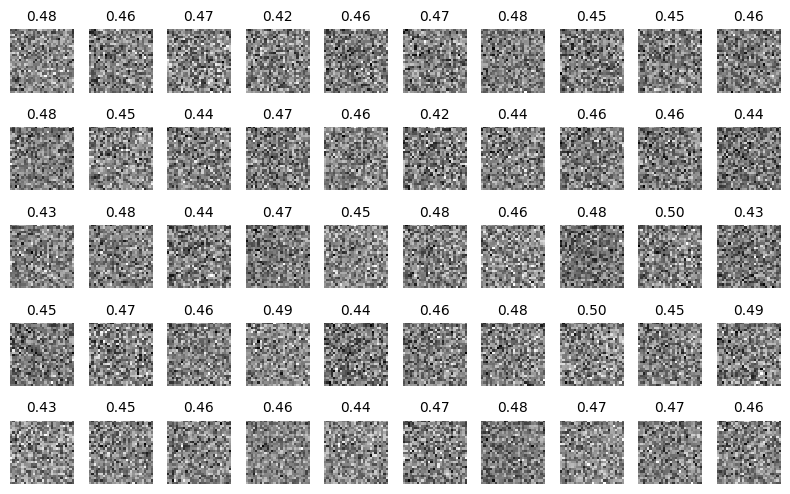

--------------- Epoch 1 ---------------


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 546/546 [00:58<00:00,  9.38it/s]


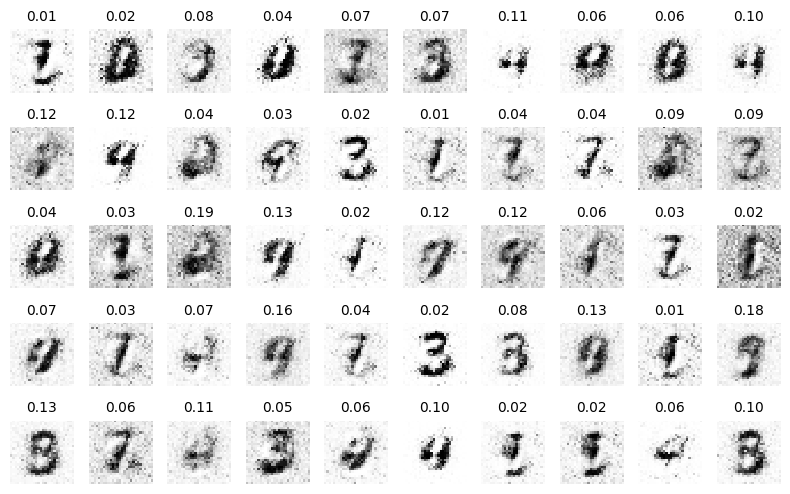

In [17]:
# escolha das √©pocas e do batch_size para o treinamento da GAN
epochs = 1
batch_size = 128
train(epochs, batch_size)

This code takes less than a minute per epoch on a GPU T4 and that is the main reason this code was selected. You can experiment by using more epochs and by adding more (and different) layers to both the generator and discriminator. However, when using more complex and deep architectures the runtime will also increase if you are using only a CPU. However, do not let that stop you from experimenting!

In [26]:
# aqui temos um treinamento individual, por tamanho do lote (batch_count) e n√£o por √©pocas
batch_size = 128
batch_ = x_train.shape[0] / batch_size
batch_count = batch_ // 2
#batch_count = 100
print('batch count:', int(batch_count))

for i in tqdm(range(int(batch_count))):
  # Get a random set of input noise and images
  noise = np.random.normal(0, 1, size=[batch_size, random_dim])
  # random batch size set of x_train images
  image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
  # Generate fake MNIST images
  generated_images = generator.predict(noise, verbose='None')
  X = np.concatenate([image_batch, generated_images])

  # Labels for generated and real data
  y_dis = np.zeros(2*batch_size)
  # One-sided label smoothing
  y_dis[:batch_size] = 1.0

  # Train discriminator
  discriminator.trainable = True
  discriminator.train_on_batch(X, y_dis)

  # Train generator
  noise = np.random.normal(0, 1, size=[batch_size, random_dim])
  y_gen = np.ones(batch_size)
  discriminator.trainable = False
  gan.train_on_batch(noise, y_gen)

batch count: 273


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 273/273 [00:28<00:00,  9.73it/s]


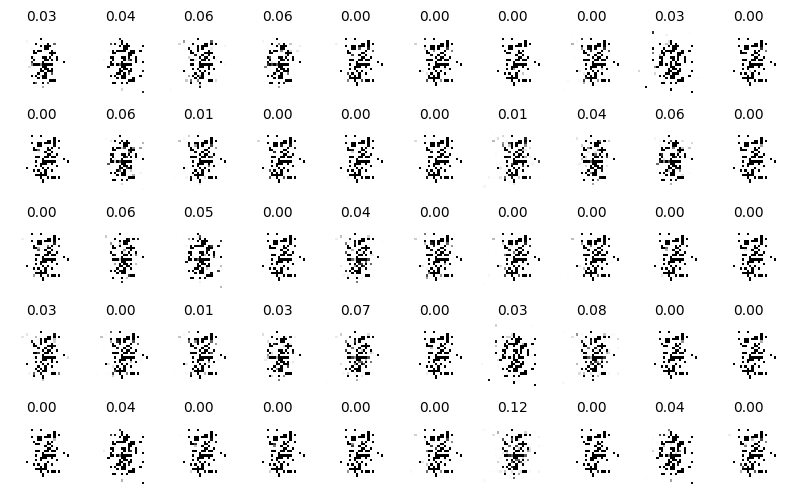

In [27]:
plot_generated_images()

Aqui vamos gerar uma amostra da entrada random da GAN (ruido), plotar a entrada 10 x 10, depois plotar a predi√ß√£o do Gerador (generator), depois plotar a predi√ß√£o do Discrinador (discriminator) na imagem fake e por fim plotar uma imagem aleat√≥ria do banco de dados real (x_train) e fazer uma predi√ß√£o com o Discriminador.

random noise shape: (1, 100)


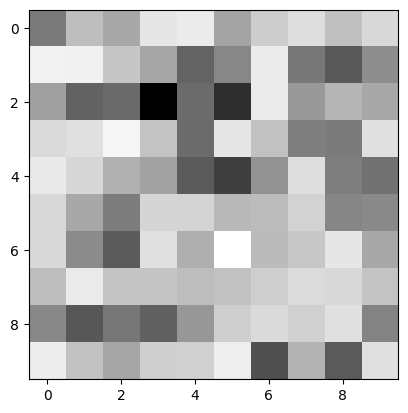


generated images shape: (1, 784)


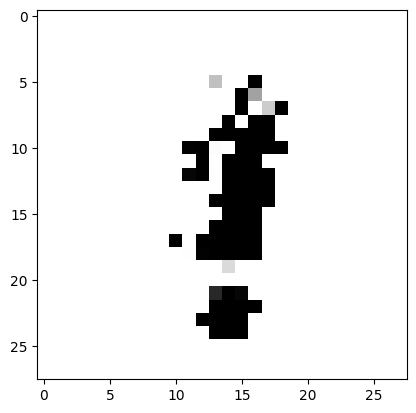

fake image discriminator prediction: [0.45085248]




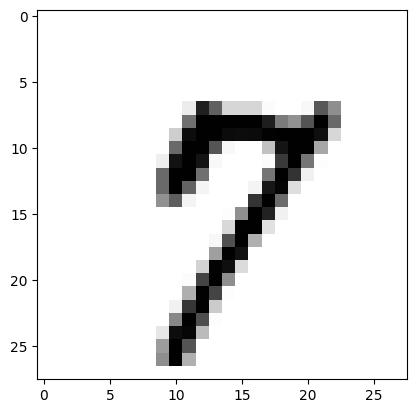

real image discriminator prediction: [0.65878826]


In [44]:
# rotina para plotar e predizer uma amostra
noise = np.random.normal(0, 1, size=[1, random_dim])
print('random noise shape:', noise.shape)
plt.imshow(noise[0].reshape(10,10), cmap='Greys')
#plt.figure(figsize=(1,1))
plt.show()
generated_images = generator.predict(noise, verbose='None')
print('\ngenerated images shape:', generated_images.shape)
plt.imshow(generated_images[0].reshape(28,28), cmap='Greys')
plt.show()
discriminator_predict = discriminator.predict(generated_images, verbose='None')
print('fake image discriminator prediction:', discriminator_predict[0])
#print(gan.predict(noise))
i = np.random.randint(0, x_train.shape[0], size=1)
plt.imshow(x_train[i].reshape(28,28), cmap='Greys')
print('\n')
plt.show()
discr_predict = discriminator.predict(x_train[i], verbose='None')
print('real image discriminator prediction:', discr_predict[0])

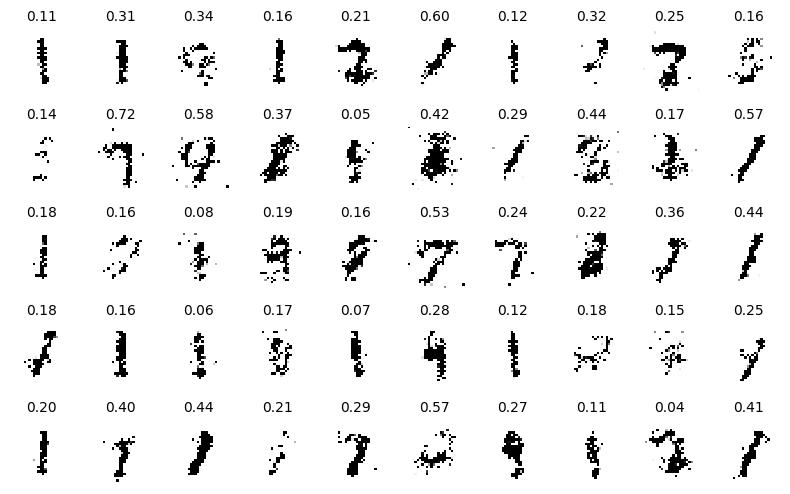

In [45]:
# aqui vamos plotar 50 amostras das imagens geradas (fake) com as predi√ß√µes do discriminador
plot_generated_images()

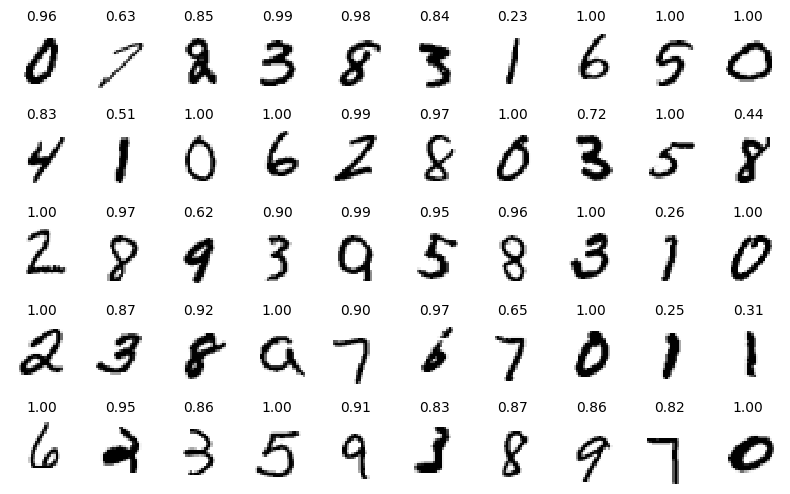

In [46]:
# aqui vamos plotar 50 amostras das imagens reais (x_train) com as predi√ß√µes do discriminador
examples=50
dim=(10, 10)
figsize=(8, 10)

image_batch = x_train[np.random.randint(0, x_train.shape[0], size=examples)]
discr_predict = discriminator.predict(image_batch, verbose='None')
x_images = image_batch.reshape(examples, 28, 28)

plt.figure(figsize=figsize)
for i in range(x_images.shape[0]):
  plt.subplot(dim[0], dim[1], i+1)
  plt.imshow(x_images[i], interpolation='nearest', cmap='gray_r')
  a=discr_predict[i][0]
  fo = "{:.2f}".format(a)
  plt.title(str(fo), fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

## Conclus√£o  
Parab√©ns! Voc√™ chegou ao final deste tutorial, no qual aprendeu os conceitos b√°sicos das **Redes Generativas Adversariais (GANs)** de forma intuitiva! Al√©m disso, voc√™ implementou seu primeiro modelo com a ajuda da biblioteca Keras.  

As **Redes Generativas Adversariais (GANs)** representam um paradigma poderoso no campo do aprendizado de m√°quina, oferecendo diversas aplica√ß√µes e funcionalidades. Esta an√°lise do conte√∫do abordou a natureza abrangente das GANs, cobrindo sua defini√ß√£o, aplica√ß√µes, componentes, metodologias de treinamento, fun√ß√µes de perda, desafios, varia√ß√µes, etapas de implementa√ß√£o e demonstra√ß√µes pr√°ticas. As GANs demonstraram capacidades not√°veis na gera√ß√£o de dados realistas, aprimoramento de processamento de imagens e aplica√ß√µes criativas.  

Apesar de sua efic√°cia, desafios como **colapso de modos (mode collapse)** e instabilidade no treinamento ainda persistem, exigindo esfor√ßos cont√≠nuos de pesquisa. No entanto, com o entendimento adequado e uma implementa√ß√£o cuidadosa, as GANs t√™m um potencial imenso para revolucionar v√°rias √°reas, como exemplificado por sua utiliza√ß√£o pr√°tica em conjuntos de dados como o **MNIST**.  

### Principais Pontos Aprendidos:
1. **O que s√£o GANs**: Uma arquitetura composta por dois modelos (Gerador e Discriminador) que competem entre si para gerar dados realistas.  
2. **Aplica√ß√µes**: Gera√ß√£o de imagens, v√≠deos, m√∫sica, texto e muito mais.  
3. **Componentes**:  
   - **Gerador**: Cria dados a partir de um vetor de ru√≠do.  
   - **Discriminador**: Classifica dados como reais ou falsos.  
4. **Treinamento**: Um processo iterativo onde o Gerador e o Discriminador melhoram continuamente.  
5. **Desafios**: Mode collapse, instabilidade no treinamento e dificuldade de converg√™ncia.  
6. **Implementa√ß√£o**: Usando bibliotecas como Keras e TensorFlow para criar e treinar GANs.  

### Pr√≥ximos Passos:
- Experimente treinar uma GAN em outros conjuntos de dados, como **CIFAR-10** ou **CelebA**.  
- Explore varia√ß√µes avan√ßadas de GANs, como **DCGAN**, **CycleGAN**, ou **StyleGAN**.  
- Aprofunde-se em t√©cnicas para mitigar desafios como mode collapse e instabilidade no treinamento.  

As GANs s√£o uma √°rea emocionante e em constante evolu√ß√£o, com potencial para transformar ind√∫strias e criar novas possibilidades. Continue explorando e experimentando ‚Äî o c√©u √© o limite!

# Refer√™ncias

[1] Elgendy, M. *Deep Learning for Vision Systems*. Manning Publications Co. Shelter Island, NY. 2020

[3] [Deep Convolutional Generative Adversarial Network](https://www.tensorflow.org/tutorials/generative/dcgan)

[4] [DCGAN tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

[5] https://blog.paperspace.com/implementing-gans-in-tensorflow/

[6] https://realpython.com/generative-adversarial-networks/

[7] https://www.datacamp.com/tutorial/generative-adversarial-networks

[8] https://www.analyticsvidhya.com/blog/2021/10/an-end-to-end-introduction-to-generative-adversarial-networksgans/

##Exerc√≠cios
1. Analise e comente as linhas de c√≥digo, comentando e descrevendo os comandos.
1. Altere o learning rate do otimizador e compare os resultados.
1. Altere o otimizador e compare os resultados.
1. Modifique o compilador inserindo o comando *metrics=['accuracy']* para coletar dados para plotar os gr√°ficos de *loss e accuracy*.
1. Utilize o banco de dados MNIST Fashion e verifique o desempenho da rede.
1. Modifique a arquitetura da rede para trabalhar com imagens coloridas. Utilize o banco de dados CIFAR10 e verifque o desempenho da rede.